In [1]:
import sys
sys.path.insert(0, '../')

## Annotations

In [2]:
from yuntu.core.annotation.labels import Label, Labels
from yuntu.core.annotation.annotation import Annotation
from yuntu.core.annotation.annotation import WeakAnnotation
from yuntu.core.annotation.annotation import TimeIntervalAnnotation
from yuntu.core.annotation.annotation import FrequencyIntervalAnnotation
from yuntu.core.annotation.annotation import BBoxAnnotation
from yuntu.core.annotation.annotation import PolygonAnnotation
from yuntu.core.annotation.annotation import LineStringAnnotation

In [ ]:
labels = Labels([
    Label('species', 'Myotis myotis'),
    Label('genus', 'Myotis'),
    Label('family', 'Vespertilionidae')
])

In [3]:
weak = WeakAnnotation(labels=labels)

In [4]:
interval = TimeIntervalAnnotation(start_time=0, end_time=2, labels=labels)
freq_interval = FrequencyIntervalAnnotation(min_freq=1000, max_freq=5000, labels=labels)

(0.0, 11000.0)

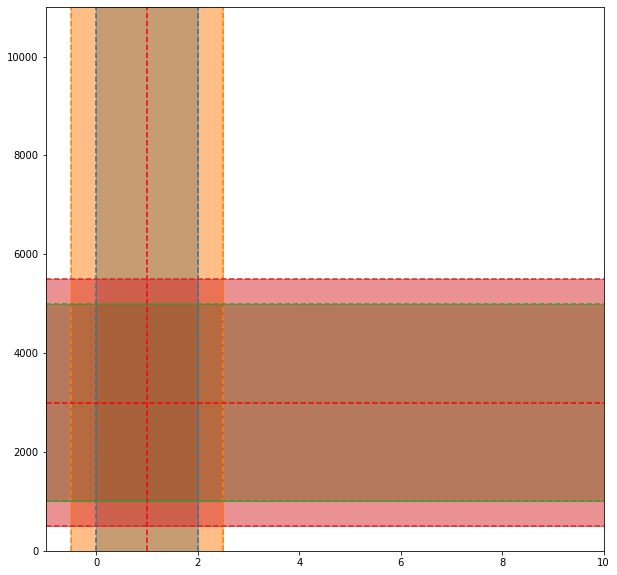

In [5]:
ax = interval.plot(key='species')
interval.buffer(time=0.5).plot(ax=ax)
interval.to_center_line().plot(ax=ax, color='red')
freq_interval.plot(ax=ax)
freq_interval.buffer(500).plot(ax=ax)
freq_interval.to_center_line().plot(ax=ax, color='red')
ax.set_xlim(-1, 10)
ax.set_ylim(0, 11000)

In [6]:
interval.to_dict()

{'id': '9e9f528f-f75c-47d0-86f7-b5de4ddb3e11',
 'labels': [{'key': 'species', 'value': 'Myotis myotis'},
  {'key': 'genus', 'value': 'Myotis'},
  {'key': 'family', 'value': 'Vespertilionidae'}],
 'type': 'TimeIntervalAnnotation',
 'geometry': {'type': 'TimeInterval', 'start_time': 0.0, 'end_time': 2.0}}

In [7]:
interval.to_center_line().to_dict()

{'id': '9e9f528f-f75c-47d0-86f7-b5de4ddb3e11',
 'labels': [{'key': 'species', 'value': 'Myotis myotis'},
  {'key': 'genus', 'value': 'Myotis'},
  {'key': 'family', 'value': 'Vespertilionidae'}],
 'type': 'TimeLineAnnotation',
 'geometry': {'type': 'TimeLine', 'time': 1.0}}

In [8]:
interval.geometry.to_dict()

{'type': 'TimeInterval', 'start_time': 0.0, 'end_time': 2.0}

(-2.0, 10.0)

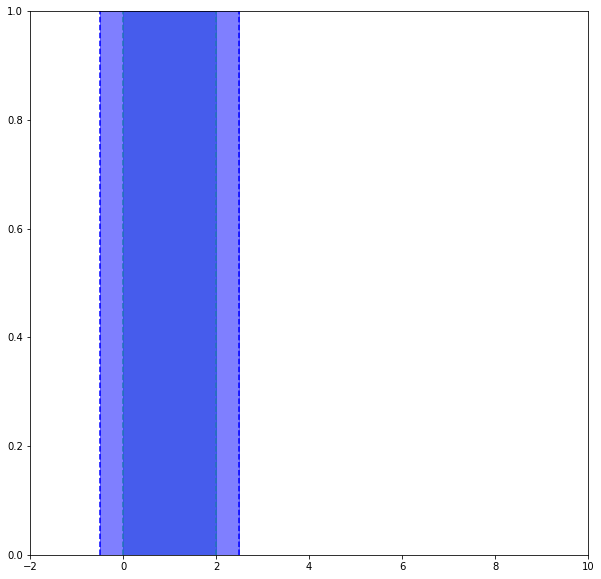

In [9]:
buffered_interval = interval.buffer(.5)

ax = interval.plot(key='species')
buffered_interval.plot(ax=ax, color='blue', label=False)

ax.set_xlim(-2, 10)

In [10]:
bbox = BBoxAnnotation(labels=labels, start_time=0, end_time=1, min_freq=0, max_freq=1000)

In [11]:
bbox_1 = bbox.buffer([1, 0])
bbox_2 = bbox.buffer([0, 200])
bbox_3 = bbox.buffer(time=2, freq=300)

(-2.0, 10.0)

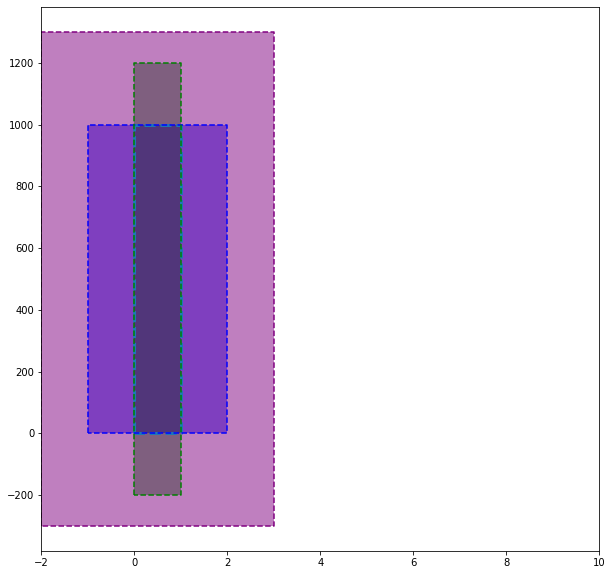

In [12]:
ax = bbox.plot(linewidth=3)
bbox_1.plot(ax=ax, color='blue')
bbox_2.plot(ax=ax, color='green')
bbox_3.plot(ax=ax, color='purple')

ax.set_xlim(-2, 10)

In [13]:
vertices = [(0, 0), (1, 1000), (2, 3500), (3, 2500), (4, 0)]
linestring = LineStringAnnotation(vertices=vertices, labels=labels)

In [14]:
g = linestring.buffer([1, 2000])

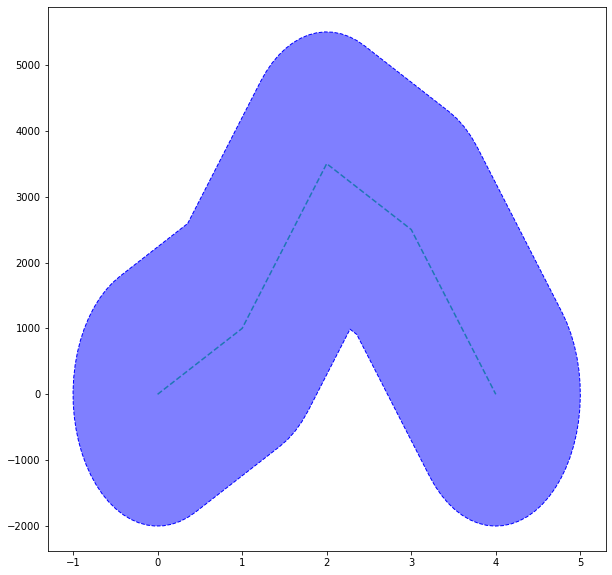

In [15]:
ax = linestring.plot()
g.plot(ax=ax, color='blue')

In [16]:
shell = [(2, 1000), (3, 1500), (4, 4500), (0, 3300)]
holes = [
    [(1, 3000), (2, 1500), (2.5, 2500)],
    [(2.5, 3500), (3, 4000), (3.5, 3400)]
]
polygon = PolygonAnnotation(shell=shell, holes=holes, labels=labels)

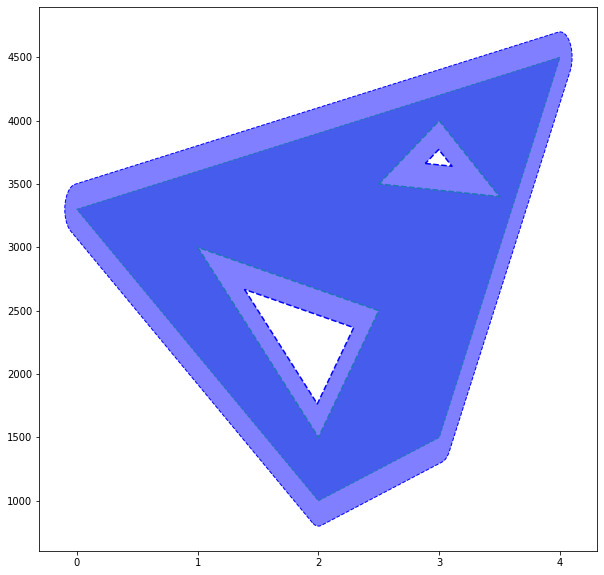

In [17]:
ax = polygon.plot();
polygon.buffer([0.1, 200]).plot(ax=ax, color='blue')

### Dictionary representations

In [19]:
weak_dict = weak.to_dict()

In [20]:
interval_dict = interval.to_dict()

In [21]:
freq_dict = freq_interval.to_dict()

In [22]:
bbox_dict = bbox.to_dict()

In [23]:
linestring_dict = linestring.to_dict()

In [24]:
polygon_dict = polygon.to_dict()

In [25]:
weak_dict

{'id': 'c1a6f5c4-a0d7-4a8f-a9f5-3fd88b9db21c',
 'labels': [{'key': 'species', 'value': 'Myotis myotis'},
  {'key': 'genus', 'value': 'Myotis'},
  {'key': 'family', 'value': 'Vespertilionidae'}],
 'type': 'WeakAnnotation',
 'geometry': {'type': 'Weak'}}

In [26]:
bbox_dict

{'id': '3a4fad96-5391-4b9e-9190-5253d36482a8',
 'labels': [{'key': 'species', 'value': 'Myotis myotis'},
  {'key': 'genus', 'value': 'Myotis'},
  {'key': 'family', 'value': 'Vespertilionidae'}],
 'type': 'BBoxAnnotation',
 'geometry': {'type': 'BBox',
  'start_time': 0.0,
  'end_time': 1.0,
  'min_freq': 0.0,
  'max_freq': 1000.0}}

In [27]:
reconstructed_weak = Annotation.from_dict(weak_dict)
reconstructed_interval = Annotation.from_dict(interval_dict)
reconstructed_freq = Annotation.from_dict(freq_dict)
reconstructed_bbox = Annotation.from_dict(bbox_dict)
reconstructed_linestring = Annotation.from_dict(linestring_dict)
reconstructed_polygon = Annotation.from_dict(polygon_dict)

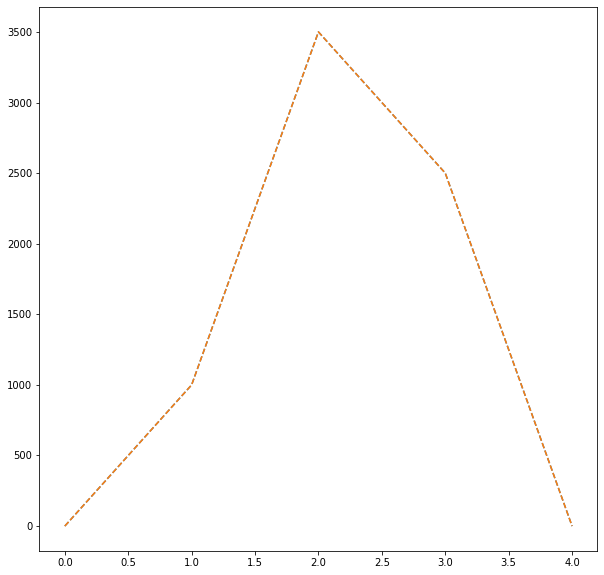

In [28]:
ax = linestring.plot()
reconstructed_linestring.plot(ax=ax)